In [1]:
from glob import glob
import matplotlib.pyplot as plt
import cv2 
import numpy as np

0T1
1T2
2T3
T1-T2
T1
T2-T3
T3-T1
T3-T2-T1
single-all3-T1
single-all3-T2
single-all3-T3
single-multiple-T2
single-multiple-T3
7 [8, 9, 10]
2
2
2
6 6
12.894015357929396
22.186875712559857


<Figure size 6500x500 with 0 Axes>

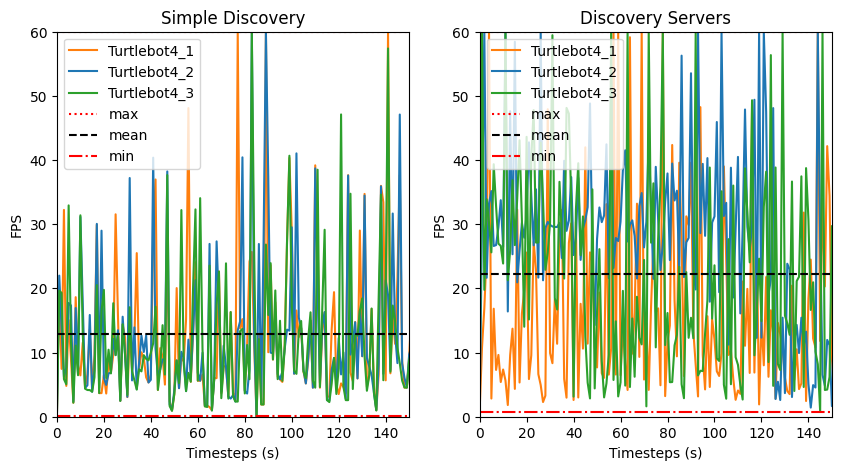

In [73]:
import json

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y = np.clip(y,0,60)
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth



def get_fps(path):
    jsons = glob(path+'/*.json')
    jsons.sort()
    fig = plt.figure(figsize=(len(jsons)*5,5))
    for file in jsons:
        
        with open(file) as f:
            
            data = json.load(f)
            data['file'] = file.split('/')[-1].split('.')[0]
            yield data
            #print(data.keys())
            #plt.subplot(1,len(jsons),jsons.index(file)+1)
            #for i in range(len(data['FPSs'])):
            #    result = data['FPSs'][i]
            #    result = smooth(result,10)
            #    plt.plot(result,label = data['Labels'][i])
            #    plt.title(file)
            #    plt.ylim([0,60])
            #    plt.legend()
            #plt.plot(data['FPSs'],label = data['Labels'])

n2label = {
    'T1':'Turtlebot4_1',
    'T2':'Turtlebot4_2',
    'T3':'Turtlebot4_3',
}

# matplotlib color
n2color = {
    'T1':'tab:orange', # 'red
    'T2':'tab:blue', # 'blue'
    'T3':'tab:green', # 'green'
}

def plot(data,desc):

    lblidx = [(i,label) for i,label in enumerate(data['Labels']) ]
    lblidx.sort(key = lambda x: x[1])
    results = []

    for i,label in lblidx:
        if label == 'TOTAL':
            continue

        result = data['FPSs'][i]

        result = smooth(result,1)
        results.append(result)
        plt.plot(result,label = n2label[label],color = n2color[label])
        plt.title(desc)



    arr = np.array(results)
    #arr = np.clip(arr,0,60)
    #arr = smooth(arr,5)
    #print(arr)
    #print(arr.shape)

    print(arr.mean())
    avg = arr.mean()
    min = arr.min()
    max = arr.max()


    plt.ylabel('FPS')
    plt.xlabel('Timesteps (s)')
    plt.ylim([0,60])
    plt.xlim([0,150])

    plt.plot([0,150],[max,max],label = 'max',color = 'red',linestyle = ':')
    plt.plot([0,150],[avg,avg],label = 'mean',color = 'black',linestyle = '--')
    plt.plot([0,150],[min,min],label = 'min',color = 'red',linestyle = '-.')
    

    plt.legend()

def merge(data):
    result = {
        'Labels':[],
        'FPSs':[]
    }

    for i in range(len(data)):
        result['Labels'].extend(data[i]['Labels'])
        print(len(data[i]['FPSs']))
        for j in range(len(data[i]['FPSs'])):
            result['FPSs'].append(data[i]['FPSs'][j][0:160])

        #result['FPSs'].extend(data[i]['FPSs'])
    
    print(len(result['Labels']),len(result['FPSs']))

    return result
    



jsonso = list(get_fps('fpss'))
begining = None

end = []
for i in range(len(jsonso)):
    file = jsonso[i]['file']
    print(file)

    if file == "T3-T2-T1":
        begining = i
    if file == "single-all3-T1":
        end.append(i)
    if file == "single-all3-T2":
        end.append(i)
    if file == "single-all3-T3":
        end.append(i)


print(begining,end)


ends = np.array(jsonso)[end]
ends = merge(ends)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(jsonso[begining],"Simple Discovery")
plt.subplot(1,2,2)
plot(ends,'Discovery Servers')

